# Decision Tree Classifier with Employee Attrition Dataset

In this notebook, we will build a decision tree classifier using the scikit-learn library. We will use a hypothetical employee attrition dataset for this example.

## Import Libraries
First, let's import the necessary libraries.

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.calibration import LabelEncoder
import matplotlib.pyplot as plt

## Load and Explore the Dataset
Next, we will load the employee attrition dataset ('employee_attrition_small.csv') and explore its contents.

In [67]:
df = pd.read_csv("employee_attrition_small.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationField,Gender,HourlyRate,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,TotalWorkingYears
0,41,Yes,Travel_Rarely,1102,Sales,Life Sciences,Female,94,Sales Executive,4,Single,5993,19479,8,Yes,8
1,49,No,Travel_Frequently,279,Research & Development,Life Sciences,Male,61,Research Scientist,2,Married,5130,24907,1,No,10
2,37,Yes,Travel_Rarely,1373,Research & Development,Other,Male,92,Laboratory Technician,3,Single,2090,2396,6,Yes,7
3,33,No,Travel_Frequently,1392,Research & Development,Life Sciences,Female,56,Research Scientist,3,Married,2909,23159,1,Yes,8
4,27,No,Travel_Rarely,591,Research & Development,Medical,Male,40,Laboratory Technician,2,Married,3468,16632,9,No,6


## Preprocess the Data
We need to preprocess the data, including handling categorical variables and missing values. label encoder

In [68]:
print(df.isnull().sum())

#for missing values
imputer = SimpleImputer(strategy="mean")
SimpleImputer(strategy="most_frequent")

#create copy to store encoded data so dont touch original dataset
df_encoded = df.copy()

#label encoding
le = LabelEncoder()

# list of categorical columns, strings
cat_cols = ["BusinessTravel", "Department",
            "EducationField", "Gender", "JobRole",
            "MaritalStatus", "OverTime"]

for col in cat_cols:
    df_encoded[col] = le.fit_transform(df[col])

#uses the encoded df
x = df_encoded.drop("Attrition", axis=1)
y = df_encoded["Attrition"]


Age                   0
Attrition             0
BusinessTravel        0
DailyRate             0
Department            0
EducationField        0
Gender                0
HourlyRate            0
JobRole               0
JobSatisfaction       0
MaritalStatus         0
MonthlyIncome         0
MonthlyRate           0
NumCompaniesWorked    0
OverTime              0
TotalWorkingYears     0
dtype: int64


## Split the Dataset
We will split the dataset into training and testing sets.

In [69]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

## Train and evaluate the Decision Tree Model
#### Please note that the maximum depth shouldn't be greater than 3

In [ ]:
# Create and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=3,max_leaf_nodes=10, random_state=42)
dt_classifier.fit(X_train,y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)
print(y_pred)


['No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No']


# Evaluate model

In [71]:
# Calculate the accuracy of the decision tree model
accuracy_dt = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')

Decision Tree Accuracy: 0.85


# Visualising the Decision Tree

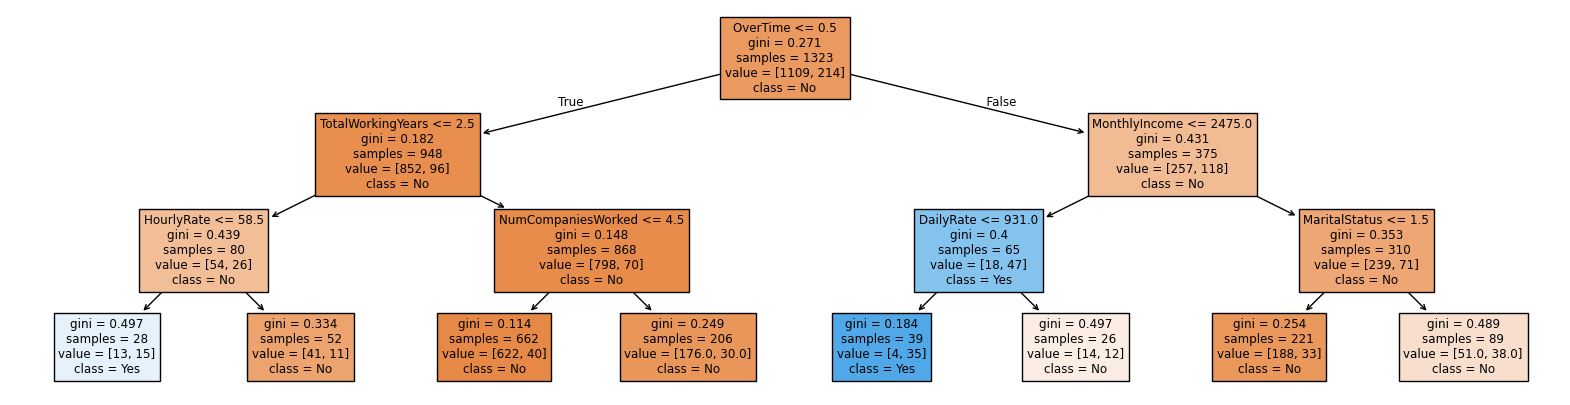

In [72]:
plt.figure(figsize=(20,5))

custom_class_names = ["No", "Yes"]

plot_tree(dt_classifier, 
    feature_names=X_train.columns, 
    class_names= custom_class_names,
    filled=True)

plt.show()